### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using mergesort and visualize the single steps

In [1]:
# PLEASE READ THIS FOR A BETTER UNDERSTANDING OF THE VISUALIZATION
# mergesort is more difficult to visualize since it does not work in place, i.e. additional arrays are used
# decisions had to be made how to visualize this in a useful way
# - the mergesort algorithm used here should be similar to the ones in the other notebooks
# - it was not desired to extend the height of the diagrams for showing the array and temporary arrays
# - another goal was to have the data in the array as often as possible
# decision: copy the keys from additionaly arrays to the array a as early as possible (this is done in merge function)
# decision: visualize the array and the temporary array in the diagram
# - consequence: the keys of the comparisons cannot be shown, see color COL_COMPARISON (***)
# - the additional arrays are plotted twice, see colors COL_LEFT and COL_RIGHT
#   - first time: before calling mergesort recursively (to show the split of array)
#   - second time: before calling merges (to have a reference for the keys in comparisons, see above (***))
# text colors for keys are:
# - black: normal array a
# - COL_TEXT_ADDITIONAL_ARRAYS: additional arrays and comparisons based on this
# This means for readability of the visualization
# 1. the keys of comparisons (COL_COMPARISON) can be found on the left hand side (COL_LEFT and COL_RIGHT)
# 2. the keys of assigmnment can also be found in the status output on the right hand side (since they are copied there)

In [2]:
# function to be called from outside to sort a
# internally we need the indexes of a for visualization
def sort(a):
    global steps, index_last_complete_step
    steps=[]
    index_last_complete_step=0
    # nothing yet sorted
    steps.append([[UNSORTED]*ARRAY_SIZE, [], [], [], [], a[:]])
    a = mergesort(a,0,len(a)-1)
    steps.append([[SORTED]*ARRAY_SIZE, [], [], [], [], a[:]])
    return a

In [3]:
def mergesort(a, left_ind, right_ind):
    global steps, index_last_complete_step
    
    length = right_ind-left_ind+1
    if length <= 1:
        return a[left_ind:right_ind+1]
    mid = left_ind + length // 2
    
    if output_left_right:
        steps.append([[], [], [], [], [left_ind, mid, right_ind], a[:]])
    
    left = mergesort(a, left_ind, mid-1)
    # store state only if it has changed compared to previous one or duplicate states shall be output
    if steps[index_last_complete_step][0][left_ind:mid] != [PART_SORTED]*((mid-1)-left_ind+1) or output_duplicate_states:
        new_state = steps[index_last_complete_step][0][:left_ind] +\
                        [PART_SORTED]*((mid-1)-left_ind+1) + steps[index_last_complete_step][0][mid:]
        step = [new_state, [], [], [], [], a[:]]
        index_last_complete_step = len(steps)
        steps.append(step)

    right = mergesort(a, mid, right_ind)
    # store state only if it has changed compared to previous one or duplicate states shall be output
    if steps[index_last_complete_step][0][mid:right_ind+1] != [PART_SORTED]*(right_ind-mid+1) or output_duplicate_states:
        new_state = steps[index_last_complete_step][0][:mid] +\
                    [PART_SORTED]*(right_ind-mid+1) + steps[index_last_complete_step][0][right_ind+1:]
        step = [new_state, [], [], [], [], a[:]]
        index_last_complete_step = len(steps)
        steps.append(step)

    if output_left_right:
        steps.append([[], [], [], [], [left_ind, mid, right_ind], a[:]])

    # improvement in case of (partially) sorted keys
    if output_compared_keys_improvement:
        steps.append([[], [], [mid-1,mid], [], [], a[:]])
    if left[-1] <= right[0]:
        return left + right
    else:
        return merge(left, right, left_ind, mid, a, a[:])

In [4]:
def merge(left, right, left_start_ind, right_start_ind, a, a_before_merge):
    global steps
    result=[]
    i=left_start_ind
    # remove the smallest available key and append it to result
    while len(left) > 0 and len(right) > 0:
        if output_compared_keys:
            steps.append([[], [left_start_ind,right_start_ind], [], [], [], a_before_merge[:]])
        if left[0] <= right[0]:
            a[i] = left[0]
            if output_assigned_keys:
                steps.append([[], [], [], [i], [], a[:]])
            i += 1
            result += [left.pop(0)]
            left_start_ind += 1
        else:
            a[i] = right[0]
            if output_assigned_keys:
                steps.append([[], [], [], [i], [], a[:]])
            i += 1
            result += [right.pop(0)]
            right_start_ind += 1
    # now one of the lists is empty, the other needs to be appended to result
    if len(left) > 0:
        # we need to do "result += left" step by step for visualization
        while len(left) > 0:
            a[i] = left[0]
            if output_assigned_keys:
                steps.append([[], [], [], [i], [], a[:]])
            i += 1
            result += [left.pop(0)]
    else:  
        # we need to do "result += right" step by step for visualization
        while len(right) > 0:
            a[i] = right[0]
            if output_assigned_keys:
                steps.append([[], [], [], [i], [], a[:]])
            i += 1
            result += [right.pop(0)]
    return result

## Constants

In [5]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_COMPARISON_IMPR = 'aqua'
COL_ASSIGNMENT = 'sandybrown'
COL_LEFT = 'maroon'
COL_RIGHT = 'darkblue'
COL_TEXT_ADDITIONAL_ARRAYS = 'w'
COL_HORIZ_LINES = 'lightgray'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions

In [6]:
def plot_values(x, y_vals, a, text_col = 'k'):
    for y in y_vals:
        plt.text(x, y, a[y], color = text_col, verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=8, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a, text_col = 'k'):
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a, text_col)

def plot_all_elements(x, y_vals, col, a, text_col = 'k'):
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, maximum], col)
    # values
    plot_values(x, list(range(minimum,maximum+1)), a, text_col)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[5])
        elif output_compared_keys and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[5], text_col = COL_TEXT_ADDITIONAL_ARRAYS)
        elif output_compared_keys_improvement and len(step[2]) > 0:
            plot_elements(i, step[2], COL_COMPARISON_IMPR, step[5])
        elif output_assigned_keys and len(step[3]) > 0:
            plot_elements(i, step[3], COL_ASSIGNMENT, step[5])
        elif output_left_right and len(step[4]) > 0:
            plot_all_elements(i, [step[4][0],step[4][1]-1], COL_LEFT, step[5], text_col = COL_TEXT_ADDITIONAL_ARRAYS)
            plot_all_elements(i, [step[4][1],step[4][2]], COL_RIGHT, step[5], text_col = COL_TEXT_ADDITIONAL_ARRAYS)

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between algorithm and output functions

In [8]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared keys], [compared keys (improvement)], 
#         [assigned keys], [additional arrays], [array]]
# [states] state for each position is one of [sorted, partially sorted, unsorted]
# [compared keys], [compared keys (improvement): two indexes in a list
# [assigned keys]: key assignment in a list
# [additional arrays]: left, mid, and right index of split of array
# [array]: copy of array in current state
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
UNSORTED = 2
PART_SORTED = 1
SORTED = 0
# used as base for the next step showing the states
index_last_complete_step = 0

## Configuration data for keys in output 

In [9]:
# change output settings here
output_compared_keys = False
output_compared_keys = True
output_compared_keys_improvement = False
output_compared_keys_improvement = True
output_assigned_keys = False
output_assigned_keys = True
output_left_right = False
output_left_right = True
output_duplicate_states = False
#output_duplicate_states = True

## Size of predefined tests

In [10]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

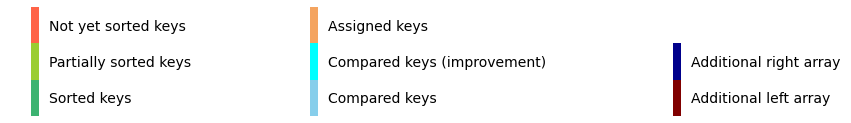

In [11]:
COLORS = [[COL_SORTED,"Sorted keys"], [COL_PART_SORTED,"Partially sorted keys"], [COL_UNSORTED,"Not yet sorted keys"],
          [COL_COMPARISON,"Compared keys"], [COL_COMPARISON_IMPR,"Compared keys (improvement)"], 
          [COL_ASSIGNMENT,"Assigned keys"], [COL_LEFT,"Additional left array"], [COL_RIGHT,"Additional right array"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(3):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(24, [i+OFFSET,i+OFFSET], COLORS[i+6][0])
    plt.text(24+OFFSET, i+OFFSET, COLORS[i+6][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


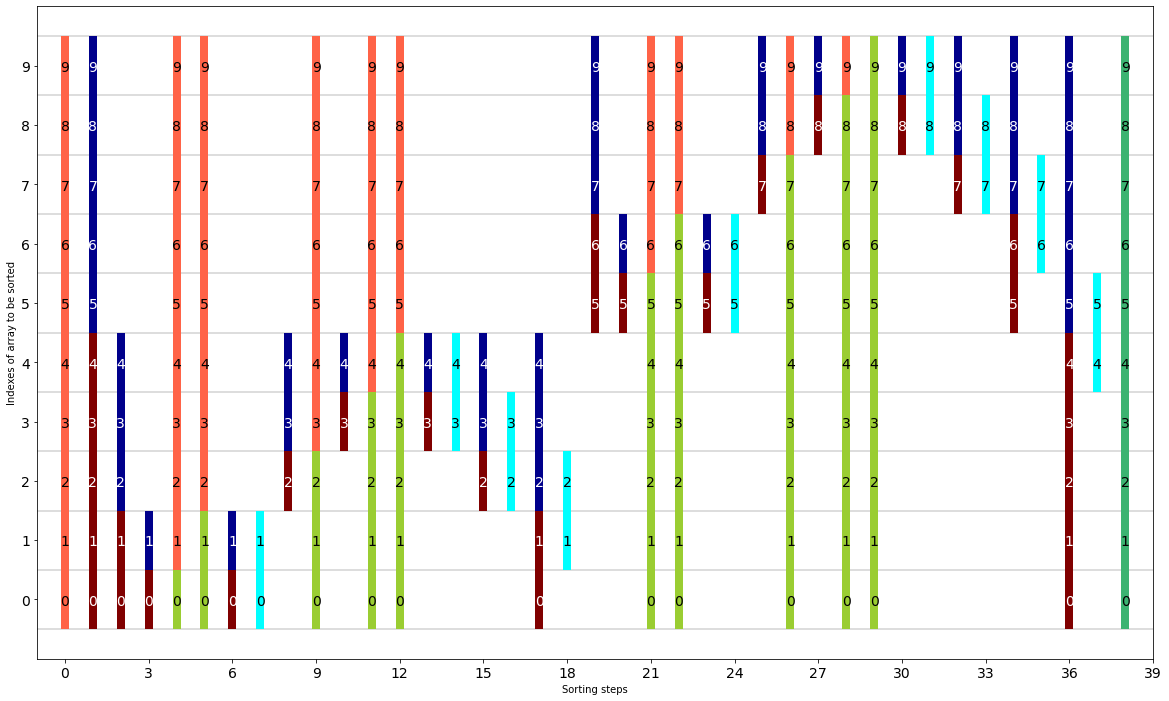

In [12]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, sort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


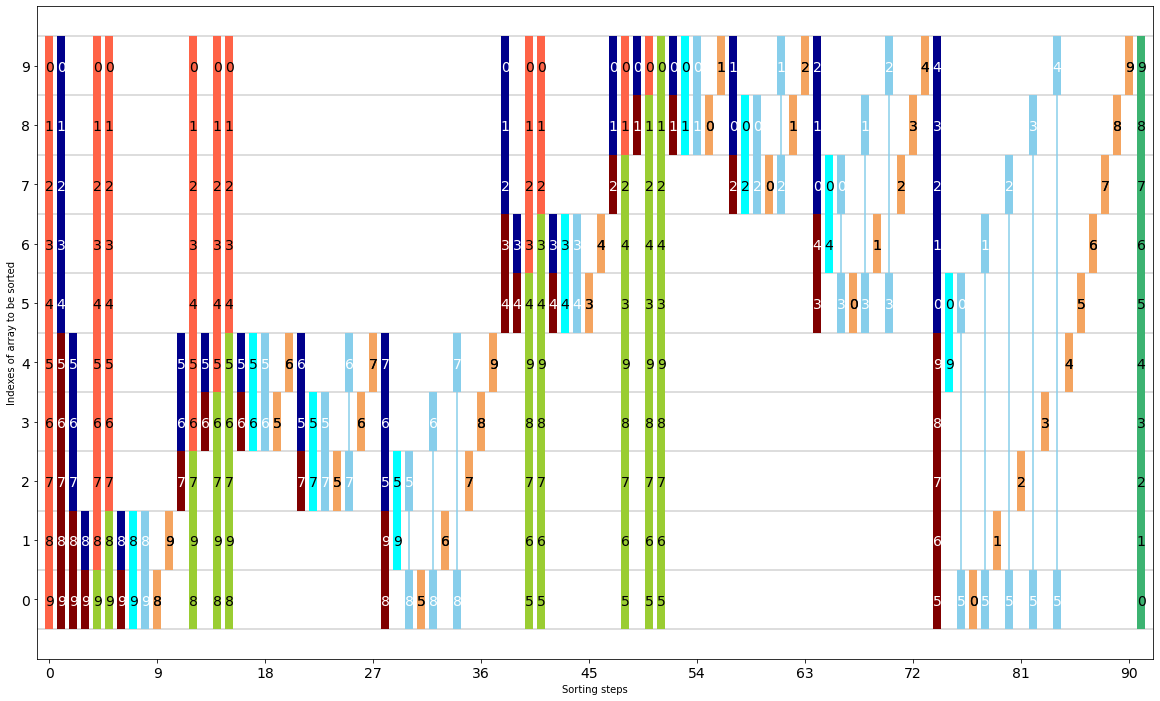

In [13]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, sort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


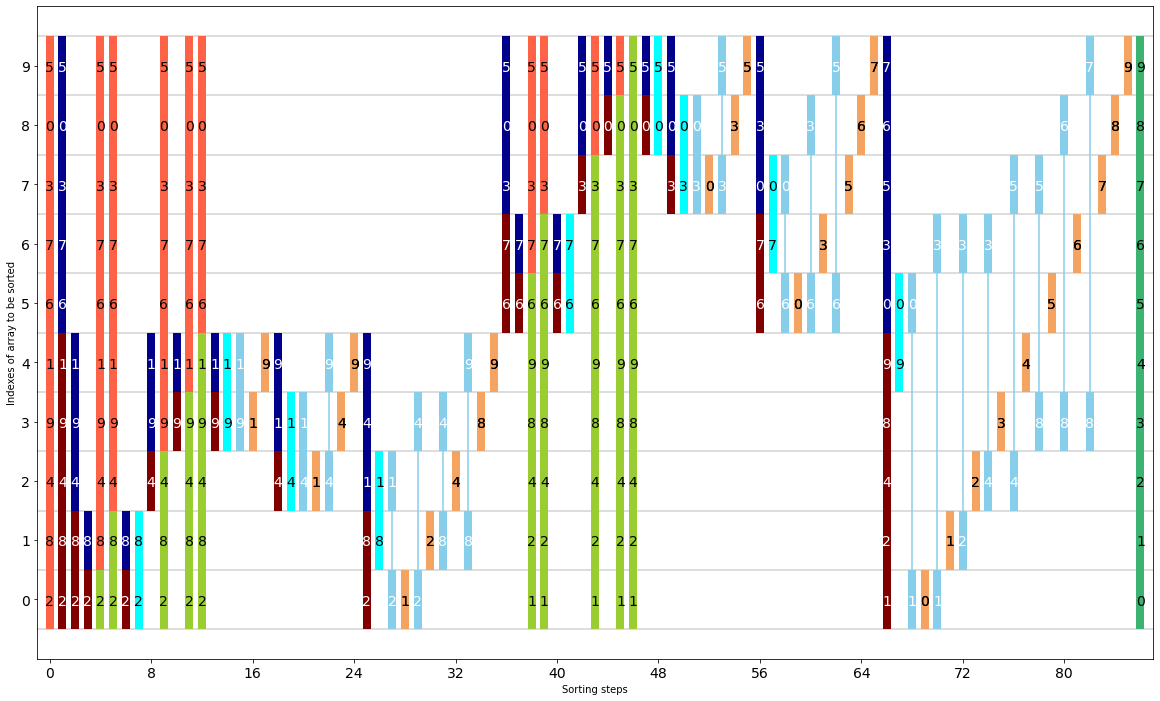

In [14]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

### Your tests here ...

Before sorting: [4, 1, 3, 2, 0]
After  sorting: [0, 1, 2, 3, 4]


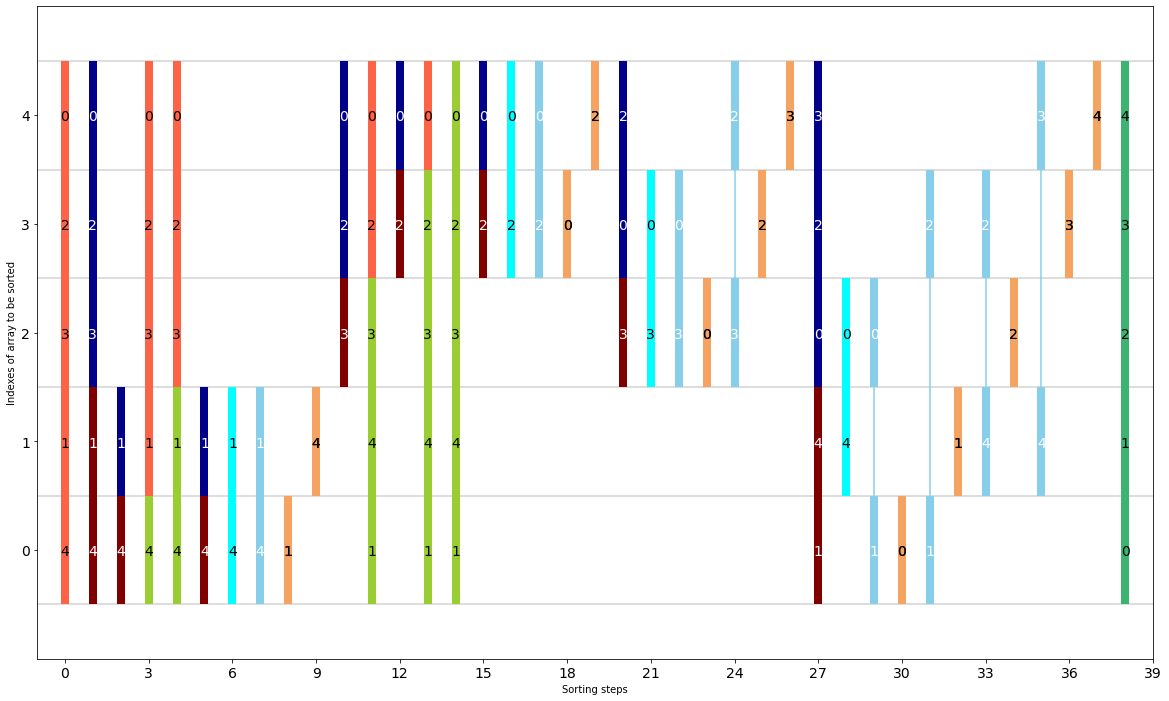

In [15]:
array = [4,1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

In [16]:
# ... and here ...